<a href="https://colab.research.google.com/github/krithigau/Neural-Network-Regression-Model/blob/main/DL_exp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [160]:
dataset1 = pd.read_csv('DL_exp1.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [162]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [163]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [164]:
# Name:Krithiga U
# Register Number:212223240076
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,9) # First linear layer with input size 1 and output size 8
        self.fc2=nn.Linear(9,5) # Second linear layer with input size 8 and output size 4
        self.fc3=nn.Linear(5,1) # Third linear layer with input size 4 and output size 1
        self.relu=nn.ReLU()
        self.history={'loss':[]}
  def forward(self,x):
        x=self.relu(self.fc1(x)) # Pass input through fc1 and apply ReLU activation
        x=self.relu(self.fc2(x)) # Pass output of fc1 through fc2 and apply ReLU activation
        x=self.fc3(x)            # Pass output of fc2 through fc3
        return x

In [165]:
ai_brain= NeuralNet()
criterion=nn.MSELoss()
optimizer=optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [166]:
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [167]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 21767.882812
Epoch [200/2000], Loss: 20833.892578
Epoch [400/2000], Loss: 19078.529297
Epoch [600/2000], Loss: 16474.337891
Epoch [800/2000], Loss: 13174.791992
Epoch [1000/2000], Loss: 9528.080078
Epoch [1200/2000], Loss: 6079.843750
Epoch [1400/2000], Loss: 3495.118896
Epoch [1600/2000], Loss: 2247.814941
Epoch [1800/2000], Loss: 1887.204590


In [168]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 1926.981079


In [169]:
loss_df = pd.DataFrame(ai_brain.history)

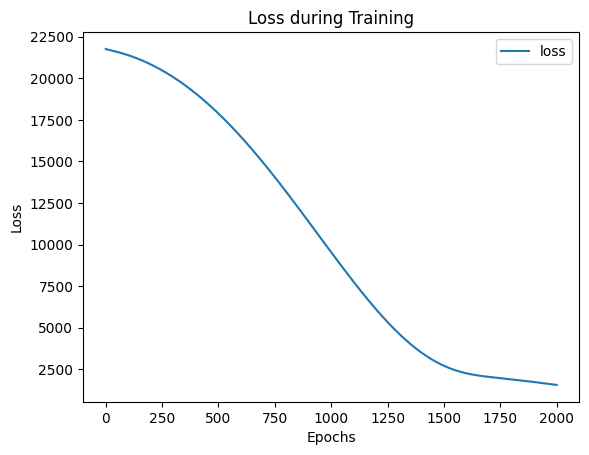

In [170]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [176]:
X_n1_1 = torch.tensor([[11]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 142.7293701171875
